In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('data/teleCust1000t.csv')

In [6]:
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [8]:
df.custcat.value_counts().sort_index()

1    266
2    217
3    281
4    236
Name: custcat, dtype: int64

## Data Preparation

In [10]:
X_data = df.drop(['custcat'], axis=1).values # independent variables
y_data = df['custcat'].values # dependent variable

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data = scaler.fit(X_data).transform(X_data.astype(float))

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## K-Nearest-Neighbour

In [16]:
# Create K-Nearest Neighbour and calculate accuracy for different 'Ks'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 50
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    clm = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clm.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

best_K = mean_acc.argmax()+1
print('Maximum Accuracy achieved:', mean_acc.max(), 'at', best_K)

Maximum Accuracy achieved: 0.41 at 38


In [18]:
from sklearn.metrics import classification_report
clm = KNeighborsClassifier(n_neighbors=best_K).fit(X_train, y_train)
yhat = clm.predict(X_test)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.36      0.57      0.44        51
           2       0.62      0.30      0.40        44
           3       0.38      0.48      0.43        54
           4       0.45      0.27      0.34        51

    accuracy                           0.41       200
   macro avg       0.45      0.41      0.40       200
weighted avg       0.45      0.41      0.40       200



Text(0, 0.5, 'Accuracy')

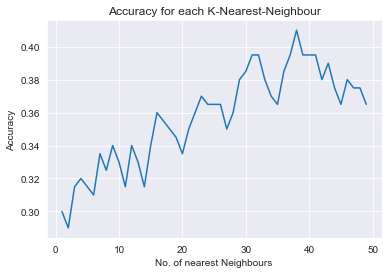

In [20]:
sns.set_style("darkgrid")
plt.plot(range(1, Ks), mean_acc)
plt.title('Accuracy for each K-Nearest-Neighbour')
plt.xlabel('No. of nearest Neighbours')
plt.ylabel('Accuracy')

## Decision Tree

In [22]:
from sklearn import tree

In [24]:
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [26]:
clm_tree = tree.DecisionTreeClassifier(criterion="entropy")
clm_tree.fit(X_train, y_train)
pred_tree = clm_tree.predict(X_test)
print("Decision Trees's Accuracy:", metrics.accuracy_score(y_test, pred_tree))

Decision Trees's Accuracy: 0.335


In [28]:
# Extract Features & Class Names
feature_names = df.drop(['custcat'], axis=1) # get feature columns
feature_names = list(feature_names.columns) # get feature columns

class_names = list(df['custcat'].value_counts().index) # get classification names
class_names = list(map(str, class_names))
class_names.sort()

In [30]:
text_representation = tree.export_text(clm_tree, feature_names=feature_names)
f = open("data/models/decision_tree.txt", "a")
f.write(text_representation)
f.close()

In [32]:
# EXPORT
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
# tree.plot_tree(clm_tree, feature_names=feature_names, class_names=class_names, filled=True);
# fig.savefig('data/models/decision_tree.png');
# print('Export Done')

## Logistic Regression

In [34]:
churn_df = pd.read_csv('data/ChurnData.csv')
churn_df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      1.0    1.0  
2  3.401      3.0    0.0  
3  4.331      4.0    0.0  
4  4.382      3.0    0.0  

[5 rows x 28 columns]

In [36]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   churn  
0      1  
1      1  
2      0  
3      0  
4      0

In [38]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].values
y = churn_df['churn'].values
print(X[:3])
print(y[:3])

[[ 11.  33.   7. 136.   5.   5.   0.]
 [ 33.  33.  12.  33.   2.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.]]
[1 1 0]


In [40]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [44]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [46]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [48]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:3]

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287]])

In [50]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

In [52]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [54]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101186

## Support Vector Machine (SVM)

In [56]:
from sklearn import svm
from sklearn import metrics
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classification_reports = []
accuracy = np.zeros(len(kernels))
confusion_matrixes = []

for i, kernel in enumerate(kernels):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    accuracy[i] = metrics.accuracy_score(yhat, y_test)
    classification_reports.append(classification_report(yhat, y_test))
    confusion_matrixes.append(metrics.confusion_matrix(y_test, yhat))

print('Maximum Accuracy achieved:', accuracy.max(), 'with', kernels[accuracy.argmax()])
print(f'\nClassification Report:\n{classification_reports[accuracy.argmax()]}')
print(f'Accuracies: {accuracy}')

Maximum Accuracy achieved: 0.725 with rbf

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        36
           1       0.27      1.00      0.42         4

    accuracy                           0.73        40
   macro avg       0.63      0.85      0.62        40
weighted avg       0.93      0.72      0.78        40

Accuracies: [0.65  0.675 0.725 0.675]


<AxesSubplot:>

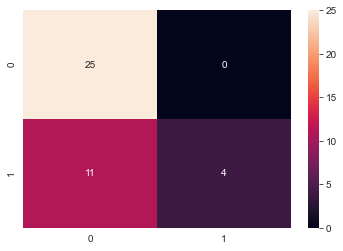

In [58]:
sns.heatmap(confusion_matrixes[accuracy.argmax()], annot=True)

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
n = 10
accuracies = np.zeros(n)
for i in range(0, n):
    clm_rf = RandomForestClassifier().fit(X_train, y_train)
    yhat = clm_rf.predict(X_test)
    accuracies[i] = metrics.accuracy_score(yhat, y_test)

round(accuracies.mean(), 4)

0.66